<a href="https://www.kaggle.com/code/simonflora/philippines-population-forecast?scriptVersionId=253486415" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/kaggle/input/philippines-population-projection-2020-to-2025/phl_population-projections_admin3_midyear2020_2025.xlsx'
df = pd.read_excel(path)
df.head()


,Region,Region_pcode,Province,Province_pcode,Municipality_City,Mun_Pcode,July2020,July2021,July2022,July2023,July2024,July2025
0,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,Adams,PH012801000,1823,1827,1830,1833,1834,1835
1,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,Bacarra,PH012802000,32778,32850,32908,32951,32979,32994
2,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,Badoc,PH012803000,32218,32299,32365,32418,32456,32480
3,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,Bangui,PH012804000,14954,14993,15024,15049,15067,15079
4,Region I (Ilocos Region),PH010000000,Ilocos Norte,PH012800000,City of Batac,PH012805000,56248,56389,56504,56595,56661,56702


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Region             1634 non-null   object
 1   Region_pcode       1634 non-null   object
 2   Province           1634 non-null   object
 3   Province_pcode     1634 non-null   object
 4   Municipality_City  1634 non-null   object
 5   Mun_Pcode          1634 non-null   object
 6   July2020           1634 non-null   int64 
 7   July2021           1634 non-null   int64 
 8   July2022           1634 non-null   int64 
 9   July2023           1634 non-null   int64 
 10  July2024           1634 non-null   int64 
 11  July2025           1634 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 153.3+ KB


In [4]:
df.shape

(1634, 12)

In [5]:
df.describe()

,July2020,July2021,July2022,July2023,July2024,July2025
count,1.634000e+03,1.634000e+03,1.634000e+03,1.634000e+03,1.634000e+03,1.634000e+03
mean,6.656791e+04,6.744102e+04,6.828167e+04,6.908982e+04,6.986763e+04,7.061077e+04
std,1.401156e+05,1.419562e+05,1.437248e+05,1.454233e+05,1.470567e+05,1.486184e+05
min,1.930000e+02,1.940000e+02,1.950000e+02,1.960000e+02,1.960000e+02,1.960000e+02
25%,2.275775e+04,2.286050e+04,2.309700e+04,2.324975e+04,2.332225e+04,2.352050e+04
50%,3.625500e+04,3.671850e+04,3.696050e+04,3.739400e+04,3.770550e+04,3.800550e+04
75%,6.501125e+04,6.549650e+04,6.608950e+04,6.653050e+04,6.704175e+04,6.764600e+04
max,3.080813e+06,3.102433e+06,3.121477e+06,3.137962e+06,3.151858e+06,3.163105e+06


In [6]:
df.isnull().sum()

Region               0
Region_pcode         0
Province             0
Province_pcode       0
Municipality_City    0
Mun_Pcode            0
July2020             0
July2021             0
July2022             0
July2023             0
July2024             0
July2025             0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1629    False
1630    False
1631    False
1632    False
1633    False
Length: 1634, dtype: bool

In [8]:
df = df.rename(columns={
    'July2020': '2020',
    'July2021': '2021',
    'July2022': '2022',
    'July2023': '2023',
    'July2024': '2024',
    'July2025': '2025',
})

In [9]:
df.tail()

,Region,Region_pcode,Province,Province_pcode,Municipality_City,Mun_Pcode,2020,2021,2022,2023,2024,2025
1629,Region IV-B (MIMAROPA),PH170000000,Romblon,PH175900000,San Fernando,PH175913000,23974,24097,24213,24322,24425,24521
1630,Region IV-B (MIMAROPA),PH170000000,Romblon,PH175900000,San Jose,PH175914000,11424,11527,11627,11725,11820,11913
1631,Region IV-B (MIMAROPA),PH170000000,Romblon,PH175900000,Santa Fe,PH175915000,16427,16480,16527,16569,16607,16640
1632,Region IV-B (MIMAROPA),PH170000000,Romblon,PH175900000,Ferrol,PH175916000,7096,7117,7135,7152,7166,7178
1633,Region IV-B (MIMAROPA),PH170000000,Romblon,PH175900000,Santa Maria (Imelda),PH175917000,9331,9498,9666,9834,10002,10170


In [10]:
df['Region'].unique().tolist()

['Region I (Ilocos Region)',
 'Region II (Cagayan Valley)',
 'Region III (Central Luzon)',
 'Region IV-A (CALABARZON)',
 'Region V (Bicol Region)',
 'Region VI (Western Visayas)',
 'Region VII (Central Visayas)',
 'Region VIII (Eastern Visayas)',
 'Region IX (Zamboanga Peninsula)',
 'Region X (Northern Mindanao)',
 'Region XI (Davao Region)',
 'Region XII (SOCCSKSARGEN)',
 'National Capital Region (NCR)',
 'Cordillera Administrative Region (CAR)',
 'Autonomous Region in Muslim Mindanao (ARMM)',
 'Region XIII (Caraga)',
 'Region IV-B (MIMAROPA)']

In [11]:
len(df['Municipality_City'].unique().tolist())

1437

In [12]:
df.columns

Index(['Region', 'Region_pcode', 'Province', 'Province_pcode',
       'Municipality_City', 'Mun_Pcode', '2020', '2021', '2022', '2023',
       '2024', '2025'],
      dtype='object')

## EDA (Exploratory Data Analysis)

### What is the overall population growth trend in the Philippines from 2020 to 2025?

In [13]:
years = ['2020', '2021', '2022', '2023', '2024', '2025']

In [14]:
national_total = df[years].sum().reset_index()
national_total.columns = ['Years', 'Total Population']
national_total

,Years,Total Population
0,2020,108771961
1,2021,110198630
2,2022,111572245
3,2023,112892768
4,2024,114163715
5,2025,115377991


In [15]:
df_long = df.melt(
    id_vars=['Region'],
    value_vars=years,
    var_name='Year',
    value_name='Population'
)

region_year_total = df_long.groupby(['Region', 'Year'], as_index=False)['Population'].sum()

region_year_total.head()

,Region,Year,Population
0,Autonomous Region in Muslim Mindanao (ARMM),2020,4183315
1,Autonomous Region in Muslim Mindanao (ARMM),2021,4270192
2,Autonomous Region in Muslim Mindanao (ARMM),2022,4358835
3,Autonomous Region in Muslim Mindanao (ARMM),2023,4449234
4,Autonomous Region in Muslim Mindanao (ARMM),2024,4541633


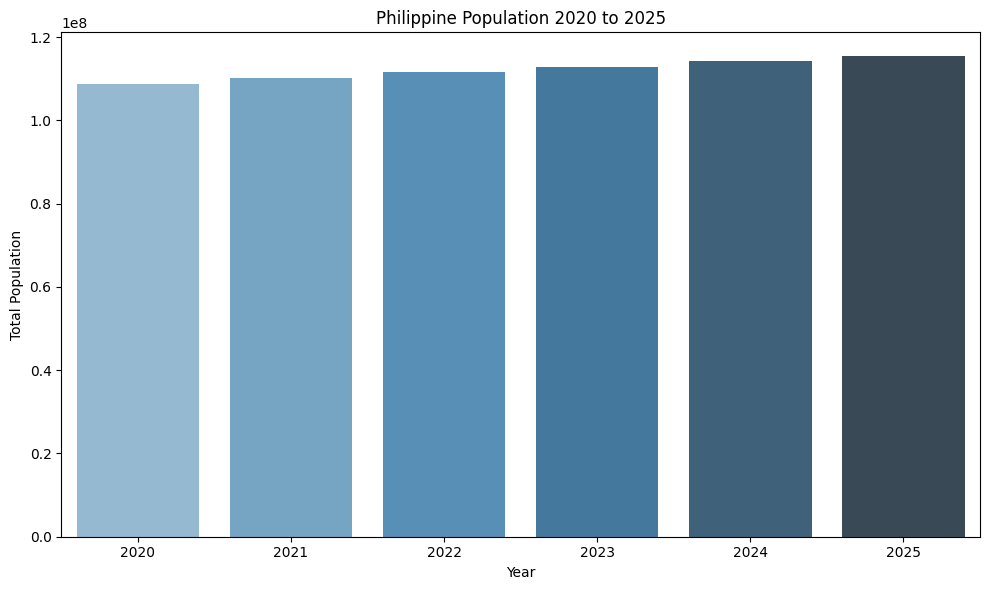

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=national_total, x='Years', y='Total Population', palette='Blues_d')

plt.title('Philippine Population 2020 to 2025')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.tight_layout()
plt.show()

### Which regions have the highest and lowest population growth?

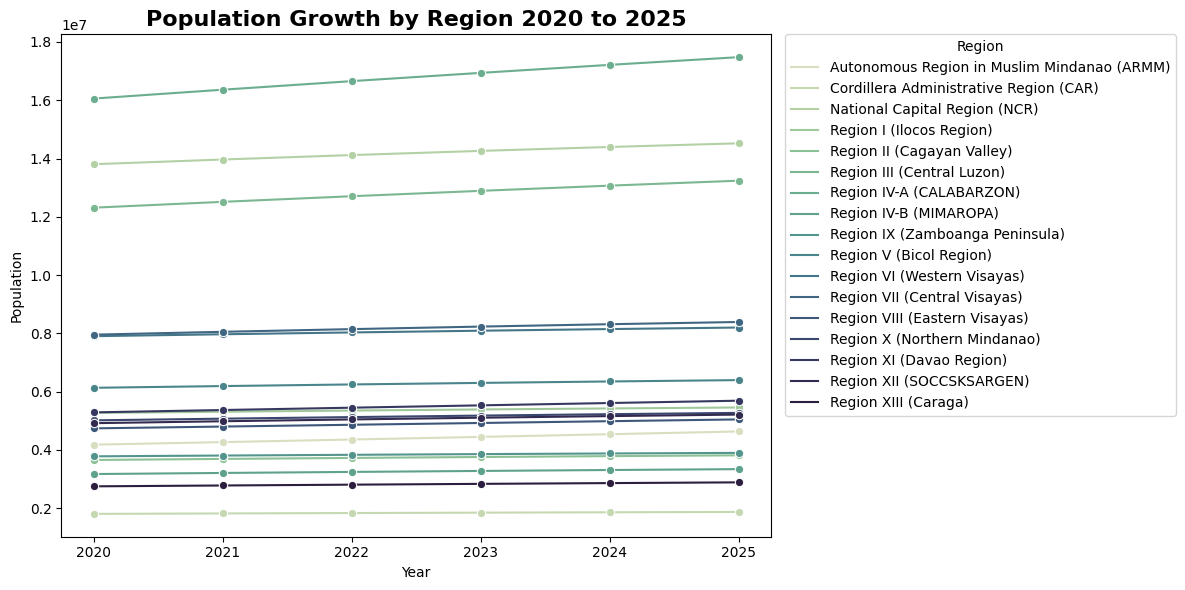

In [17]:
region_growth = df.groupby('Region')[years].sum().reset_index()
long_df = region_growth.melt(id_vars='Region', var_name='Year', value_name='Population')
long_df['Year'] = long_df['Year'].astype(int)
regions = long_df['Region'].unique()
palette = sns.cubehelix_palette(len(regions), start=0.5, rot=-.75, as_cmap=False)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=long_df,
    x='Year',
    y='Population',
    hue='Region',
    marker='o',
    palette=palette
)

plt.title('Population Growth by Region 2020 to 2025', fontsize=16, weight='bold', loc='center')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Region', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()

In [18]:
region_growth = df.groupby('Region')[years].sum().reset_index()

region_growth['Absolute Growth'] = region_growth['2025'] - region_growth['2020']
region_growth['Percentage Growth'] = ((region_growth['2025'] - region_growth['2020']) / region_growth['2020']) * 100

ordered_cols = ['Region'] + years + ['Absolute Growth', 'Percentage Growth']

region_growth_df = region_growth[ordered_cols].sort_values(by='Percentage Growth', ascending=False).reset_index(drop=True)

region_growth_df

,Region,2020,2021,2022,2023,2024,2025,Absolute Growth,Percentage Growth
0,Autonomous Region in Muslim Mindanao (ARMM),4183315,4270192,4358835,4449234,4541633,4635526,452211,10.809872
1,Region IV-A (CALABARZON),16057291,16361101,16654979,16938895,17213592,17477567,1420276,8.845054
2,Region XI (Davao Region),5290867,5371252,5451446,5531465,5611525,5691180,400313,7.566113
3,Region III (Central Luzon),12313714,12513845,12706461,12891544,13069623,13239668,925954,7.519697
4,Region VIII (Eastern Visayas),4742342,4803767,4865154,4926496,4987964,5049228,306886,6.471191
5,Region XII (SOCCSKSARGEN),4919935,4985880,5048332,5107292,5162939,5214934,294999,5.995994
6,Region VII (Central Visayas),7957045,8054770,8147077,8233964,8315667,8391706,434661,5.462593
7,Region IV-B (MIMAROPA),3174856,3212216,3247677,3281252,3313032,3342831,167975,5.290791
8,National Capital Region (NCR),13804656,13966223,14118676,14262004,14396580,14521657,717001,5.193907
9,Region X (Northern Mindanao),5017050,5074560,5128966,5180239,5228550,5273601,256551,5.113583


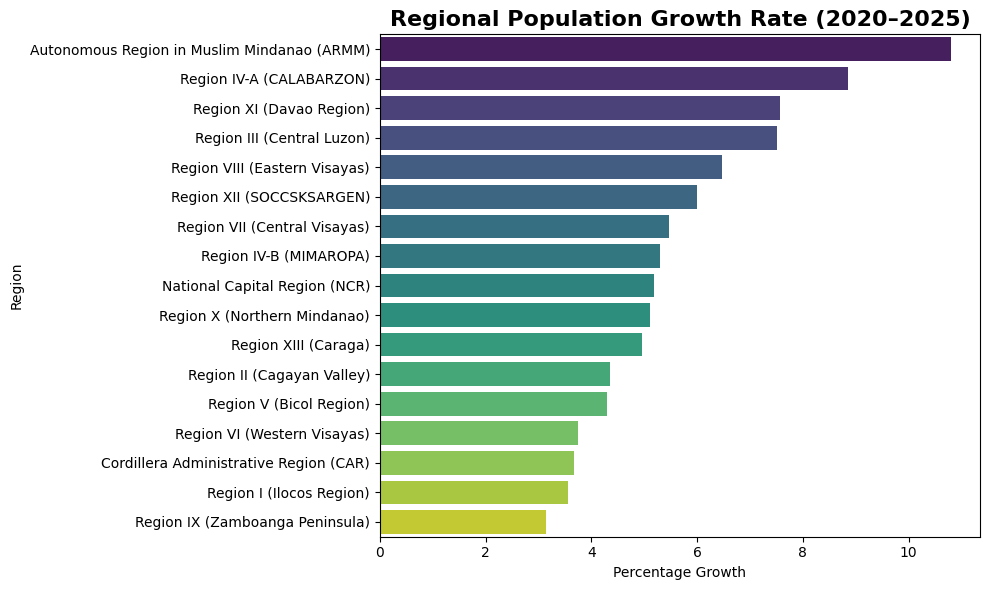

In [19]:
palette = sns.color_palette("viridis", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=region_growth_df.sort_values("Percentage Growth", ascending=False),
    x="Percentage Growth",
    y="Region",
    palette="viridis"
)

plt.title("Regional Population Growth Rate (2020–2025)", fontsize=16, weight="bold", loc="center")
plt.xlabel("Percentage Growth")
plt.ylabel("Region")

plt.tight_layout()
plt.show()

### What are the percentage growth of the Provinces in the Philippines from 2020 to 2025?

In [20]:
province_growth = df.groupby(['Province', 'Region'])[years].sum().reset_index()

province_growth['Absolute Growth'] = province_growth['2025'] - province_growth['2020']
province_growth['Percentage Growth'] = ((province_growth['2025'] - province_growth['2020']) / province_growth['2020']) * 100

ordered_cols = ['Province', 'Region'] + years + ['Absolute Growth', 'Percentage Growth']

top_province_growth = province_growth[ordered_cols].sort_values(by='Percentage Growth', ascending=False).reset_index(drop=True)

top_province_growth.head(10)

,Province,Region,2020,2021,2022,2023,2024,2025,Absolute Growth,Percentage Growth
0,Maguindanao,Autonomous Region in Muslim Mindanao (ARMM),1323051,1355938,1389642,1424161,1459585,1495725,172674,13.051198
1,Batangas,Region IV-A (CALABARZON),3033730,3107922,3183932,3261749,3341600,3423043,389313,12.832816
2,Basilan,Autonomous Region in Muslim Mindanao (ARMM),386697,395488,404492,413711,423165,432807,46110,11.924065
3,Davao Del Sur,Region XI (Davao Region),2520852,2576356,2633054,2690969,2750249,2810574,289722,11.493019
4,Sulu,Autonomous Region in Muslim Mindanao (ARMM),913590,932941,952738,972981,993722,1014855,101265,11.084294
5,Cavite,Region IV-A (CALABARZON),4210866,4305595,4395803,4481490,4562863,4639488,428622,10.178951
6,Lanao Del Sur,Autonomous Region in Muslim Mindanao (ARMM),1146287,1168123,1190440,1213248,1236601,1260369,114082,9.952307
7,Nueva Ecija,Region III (Central Luzon),2355414,2399251,2443879,2489310,2535669,2582693,227279,9.649217
8,City Of Isabela (Not A Province),Region IX (Zamboanga Peninsula),127728,130380,132907,135305,137579,139720,11992,9.388701
9,Surigao Del Norte,Region XIII (Caraga),528148,537395,546800,556375,566140,576038,47890,9.067534


###  Are there provinces or regions with declining populations?

In [21]:
declining_provinces = top_province_growth[top_province_growth['Absolute Growth'] <= 0]
declining_provinces

,Province,Region,2020,2021,2022,2023,2024,2025,Absolute Growth,Percentage Growth


In [22]:
declining_regions = region_growth_df[region_growth_df['Absolute Growth'] <= 0]
declining_regions

,Region,2020,2021,2022,2023,2024,2025,Absolute Growth,Percentage Growth


### What is the percentage growth of the population each year from 2021 to 2025?

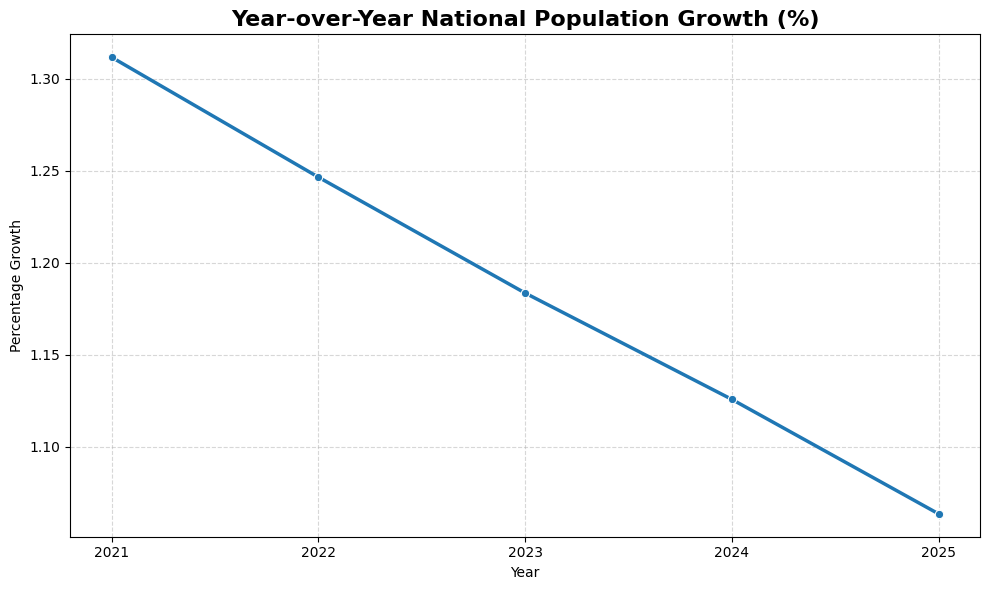

In [23]:
national_totals = df[years].sum()

percentage_growth = []

for i in range(1, len(years)):
    current = national_totals[years[i]]
    previous = national_totals[years[i - 1]]
    growth = ((current - previous) / previous) * 100
    percentage_growth.append(growth)

plt.figure(figsize=(10, 6))
sns.lineplot(
    x=years[1:],
    y=percentage_growth,
    marker='o',
    linewidth=2.5,
    color='#1f77b4'
)

plt.title("Year-over-Year National Population Growth (%)", fontsize=16, weight="bold", loc="center")
plt.xlabel("Year")
plt.ylabel("Percentage Growth")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### How much of the national population is concentrated in the top 5 regions?

In [24]:
top_regions_2025 = region_growth_df.sort_values(by='2025', ascending=False).head(5)

national_2025 = region_growth_df['2025'].sum()

top_regions_2025['Share (%)'] = (top_regions_2025['2025'] / national_2025) * 100

top_regions_2025[['Region', '2025', 'Share (%)']]

,Region,2025,Share (%)
1,Region IV-A (CALABARZON),17477567,15.148094
8,National Capital Region (NCR),14521657,12.586159
3,Region III (Central Luzon),13239668,11.475038
6,Region VII (Central Visayas),8391706,7.273229
13,Region VI (Western Visayas),8201700,7.108548


## Machine Learning

### Facebook Prophet

In [25]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [26]:
df_prophet = df.melt(
    id_vars=['Region'], 
    value_vars=years, 
    var_name='Year', 
    value_name='Population'
)

df_prophet = df_prophet.groupby('Year', as_index=False)['Population'].sum()

df_prophet['ds'] = pd.to_datetime(df_prophet['Year'] + '-01-01')
df_prophet['y'] = df_prophet['Population']
df_prophet = df_prophet[['ds', 'y']]

In [27]:
df_prophet.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [28]:
df_prophet

,ds,y
0,2020-01-01,108771961
1,2021-01-01,110198630
2,2022-01-01,111572245
3,2023-01-01,112892768
4,2024-01-01,114163715
5,2025-01-01,115377991


### Train-Test Split

In [29]:
train_df = df_prophet[df_prophet['ds'] < '2024-01-01']
test_df = df_prophet[df_prophet['ds'] >= '2024-01-01']

In [30]:
test_df

,ds,y
4,2024-01-01,114163715
5,2025-01-01,115377991


### Train Model

In [31]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(train_df)

14:51:24 - cmdstanpy - INFO - Chain [1] start processing
14:51:27 - cmdstanpy - INFO - Chain [1] done processing


### Evaluation

In [32]:
future = model.make_future_dataframe(periods=len(test_df), freq='Y')
forecast = model.predict(future)

forecast['ds'] = forecast['ds'].dt.to_period('Y').dt.start_time
forecast_eval = forecast[['ds', 'yhat']].merge(test_df, on='ds', how='inner')

mae = mean_absolute_error(forecast_eval['y'], forecast_eval['yhat'])
rmse = np.sqrt(mean_squared_error(forecast_eval['y'], forecast_eval['yhat']))
mape = (np.abs((forecast_eval['y'] - forecast_eval['yhat']) / forecast_eval['y']).mean()) * 100

print("Evaluation Results:")
print(f"MAE:  {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")

Evaluation Results:
MAE:  595,203.05
RMSE: 595,203.05
MAPE: 0.52%


### Forecasting

In [33]:
future = model.make_future_dataframe(periods=8, freq='Y')
forecast = model.predict(future)

# Filter only 2026 to 2030
forecast_2026_2030 = forecast[(forecast['ds'].dt.year >= 2026) & (forecast['ds'].dt.year <= 2030)][['ds', 'yhat']]

# Round values to integers
forecast_2026_2030['yhat'] = forecast_2026_2030['yhat'].round().astype(int)

# Print forecasted values
print(forecast_2026_2030)

           ds       yhat
7  2026-12-31  115574038
8  2027-12-31  115581645
9  2028-12-31  120343739
10 2029-12-31  120884006
11 2030-12-31  121158859
